In [1]:
import pandas as pd
# read in all the datasets
train_df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
test_X = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv') 
test_y = pd.read_csv('./house-prices-advanced-regression-techniques/sample_submission.csv')
print(train_df.shape)
print(test_X.shape)
print(test_y.shape)

(1460, 81)
(1459, 80)
(1459, 2)


# Data Processing

In [2]:
test_y.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [3]:
# combine all the data together
test_y.drop('Id', axis=1, inplace=True)
test_data = pd.concat([test_X, test_y], axis=1)
dataset = pd.concat([train_df, test_data], axis=0)
print(dataset.shape)
print(dataset.head())

(2919, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

In [4]:
# verify the data is in the right order
print(dataset.tail())

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition      SalePri

In [5]:
dataset['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [6]:
print(dataset.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object


In [7]:
# review all column names
for col in dataset.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


The dataset is a combination of types int64, float64, and object

In [8]:
# calculate the percentage of missing value in each column
missing_values = (dataset.isnull().sum() / len(dataset)).sort_values(ascending=False)
print(missing_values)

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
Foundation       0.000000
Id               0.000000
Length: 81, dtype: float64


# Explore Data Analysis
We will write a function to explore every columns in order to know more information about the dataset

In [9]:
import seaborn as sns
%matplotlib inline
# write a function to perform quick data exploration on each numeric columns
def column_investigation (df, col):
    print("Type:{}".format(df[col].dtypes))
    print("Unique values:")
    print(df[col].value_counts())
    print("Null values: {}".format(df[col].isnull().sum()))
    print()
    if df[col].dtype != object:
        print(sns.distplot(df[col].dropna()))
    else:
        print(df[col].value_counts().plot(kind= 'bar'))
for col in dataset.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [10]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

### Id 

Type:int64
Unique values:
2047    1
1088    1
1084    1
1082    1
1080    1
       ..
2532    1
483     1
2530    1
481     1
2049    1
Name: Id, Length: 2919, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


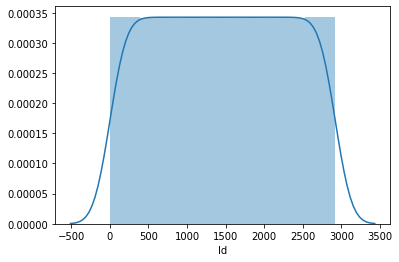

In [11]:
column_investigation(dataset, 'Id')

### MSSubClass
Data_description: Identifies the type of dwelling involved in the sale.
        
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Type:int64
Unique values:
20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


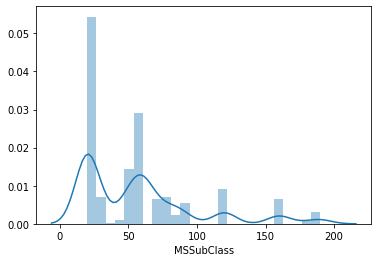

In [12]:
column_investigation(dataset, 'MSSubClass')

notice this is a categorical data with the value respresented as type int64
. We'll covert the value from int64 to str

In [13]:
# we will collect all the categorical columns
cate_cols = []
dataset['MSSubClass'] = dataset['MSSubClass'].astype(str)
print(dataset['MSSubClass'].head())

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: object


### MSZoning
Data_description: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density


Type:object
Unique values:
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Null values: 4

AxesSubplot(0.125,0.125;0.775x0.755)


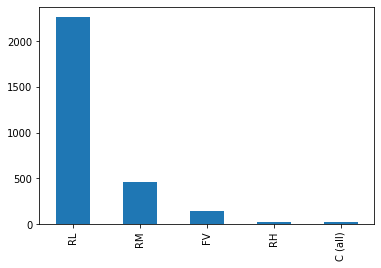

In [14]:
column_investigation(dataset, 'MSZoning')

In [15]:
# Notice there are 4 rows that contains nan value in MSZoning column. 
# calculate the percentage of each unique values in this column
(dataset['MSZoning'].value_counts() / len(dataset))

RL         0.775951
RM         0.157588
FV         0.047619
RH         0.008907
C (all)    0.008565
Name: MSZoning, dtype: float64

Since there are over 77% of all rows has the value 'RL' in this column, we are going to replace all the nan values in this column to 'RL'

In [16]:
print("Before fillna:")
print(dataset['MSZoning'].isnull().sum())
dataset['MSZoning'] = dataset['MSZoning'].fillna(value='RL')
print("After:")
print(dataset['MSZoning'].isnull().sum())

Before fillna:
4
After:
0


### LotFrontage
Data_description: Linear feet of street connected to property

Type:float64
Unique values:
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64
Null values: 486

AxesSubplot(0.125,0.125;0.775x0.755)


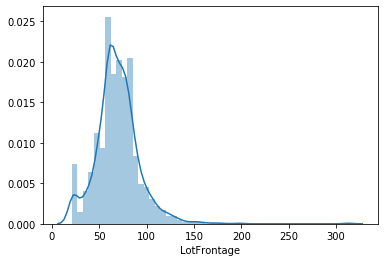

In [17]:
column_investigation(dataset, 'LotFrontage')

Noticed there are 486 null values in this numeric column. We will store the name of the column and deal with it later.

In [18]:
missing_num_cols = ['LotFrontage']

### LotArea
Data_description: Lot size in square feet

Type:int64
Unique values:
9600     44
7200     43
6000     34
9000     29
10800    25
         ..
12867     1
2628      1
8775      1
13478     1
12292     1
Name: LotArea, Length: 1951, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


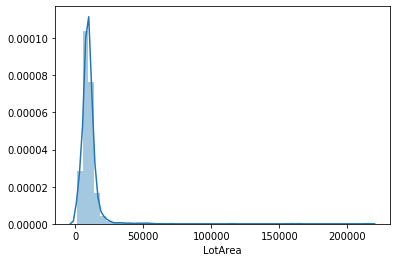

In [19]:
column_investigation(dataset, 'LotArea')

### Street
Data_description: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

Type:object
Unique values:
Pave    2907
Grvl      12
Name: Street, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


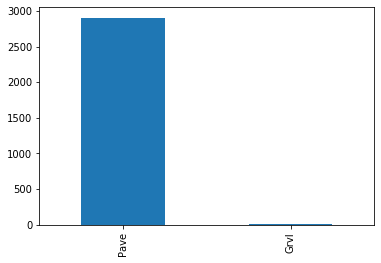

In [20]:
column_investigation(dataset, 'Street')

### Alley
Data_description: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

Type:object
Unique values:
Grvl    120
Pave     78
Name: Alley, dtype: int64
Null values: 2721

AxesSubplot(0.125,0.125;0.775x0.755)


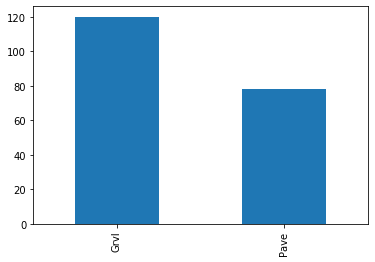

In [21]:
column_investigation(dataset, 'Alley')

In [22]:
# replace null with NA
dataset['Alley'] = dataset['Alley'].fillna('NA')
print('Number of null: {}'.format(dataset['Alley'].isnull().sum()))

Number of null: 0


### LotShape
Data_description: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

Type:object
Unique values:
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


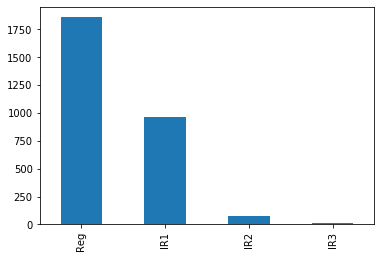

In [23]:
column_investigation(dataset, 'LotShape')

### LandContour
Data_description: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		

Type:object
Unique values:
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


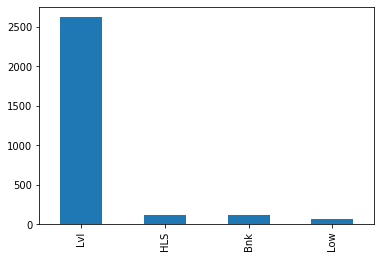

In [24]:
column_investigation(dataset, 'LandContour')

### Utilities
Data_description: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	

Type:object
Unique values:
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Null values: 2

AxesSubplot(0.125,0.125;0.775x0.755)


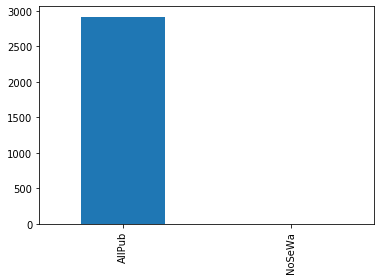

In [25]:
column_investigation(dataset, 'Utilities')

In [26]:
# notice there are two rows in the dataset contain nan value in Utilities column
# since almost all rows has the same value, we will replace the missing values with 'AllPub'
print("Before removing null values: {}".format(dataset['Utilities'].isnull().sum()))
dataset['Utilities'] = dataset['Utilities'].fillna('AllPub')
print("After fillna: {}".format(dataset['Utilities'].isnull().sum()))

Before removing null values: 2
After fillna: 0


### LotConfig
Data_description: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
		
		

Type:object
Unique values:
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


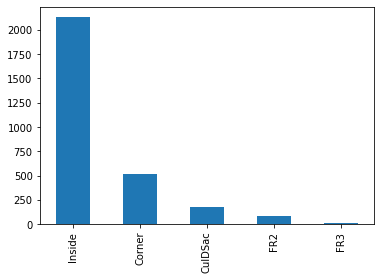

In [27]:
column_investigation(dataset, 'LotConfig')

### LandSlope
Data_description: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Type:object
Unique values:
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


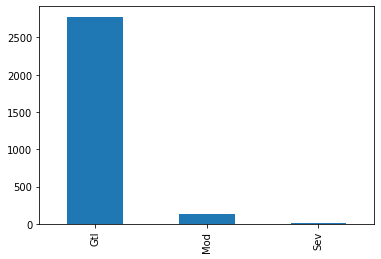

In [28]:
column_investigation(dataset, 'LandSlope')

### Neighborhood
Data_description: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Type:object
Unique values:
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


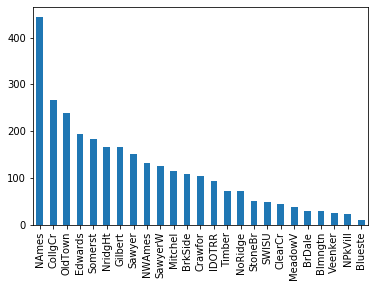

In [29]:
column_investigation(dataset, 'Neighborhood')

We can later use this column to group up all columns that still has missing values and replace the null values with the mode of their neighborhood

### Condition1
Data_description: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Type:object
Unique values:
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


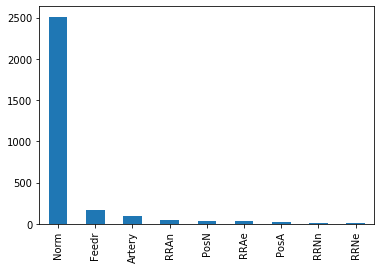

In [30]:
column_investigation(dataset, 'Condition1')

### Condition2
Data_description: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Type:object
Unique values:
Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


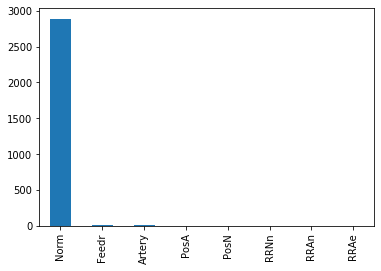

In [31]:
column_investigation(dataset, 'Condition2')

### BldgType
Data_description: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

Type:object
Unique values:
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


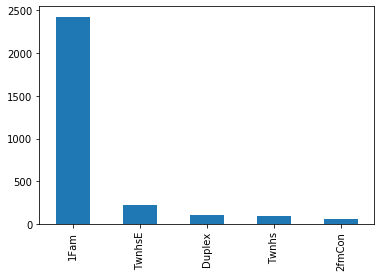

In [32]:
column_investigation(dataset, 'BldgType')

### HouseStyle
Data_description: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Type:object
Unique values:
1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


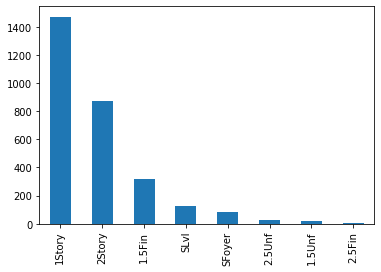

In [33]:
column_investigation(dataset, 'HouseStyle')

### OverallQual
Data_description: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

Type:int64
Unique values:
5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


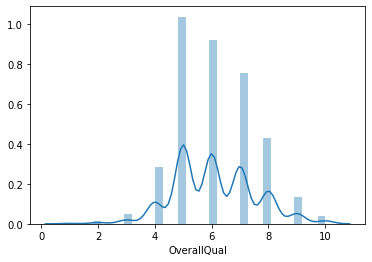

In [34]:
column_investigation(dataset, 'OverallQual')

Notice this is another categorical column that is represented as int64. We need to convert them to string type

In [35]:
dataset['OverallQual'] = dataset['OverallQual'].astype(str)

### OverallCond
Data_description: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

Type:int64
Unique values:
5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


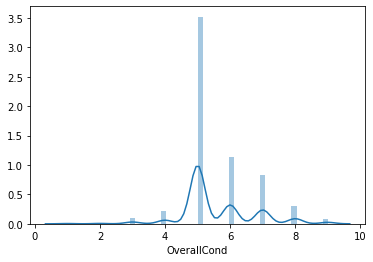

In [36]:
column_investigation(dataset, 'OverallCond')

Another categorical column that is represented as int64.

In [37]:
dataset['OverallCond'] = dataset['OverallCond'].astype(str)

### YearBuilt
Data_description: Original construction date

Type:int64
Unique values:
2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1911      1
1875      1
1879      1
1893      1
1872      1
Name: YearBuilt, Length: 118, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


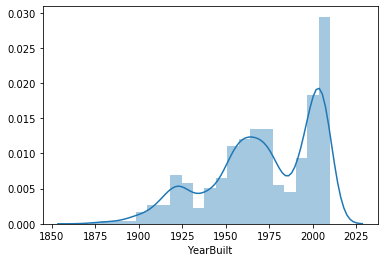

In [38]:
column_investigation(dataset, 'YearBuilt')

### YearRemodAdd
Data_description: Remodel date (same as construction date if no remodeling or additions)

Type:int64
Unique values:
1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
2010     13
1981     12
1986     12
1983     11
1982      9
Name: YearRemodAdd, Length: 61, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


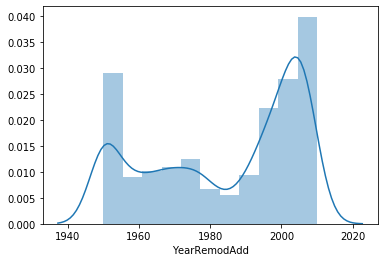

In [39]:
column_investigation(dataset, 'YearRemodAdd')

### RoofStyle
Data_description: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

Type:object
Unique values:
Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


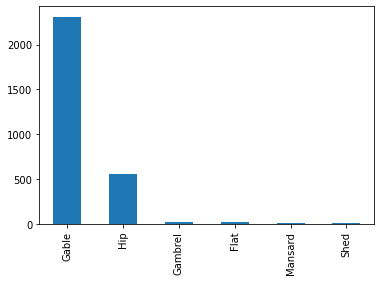

In [40]:
column_investigation(dataset, 'RoofStyle')

### RoofMatl
Data_description: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Type:object
Unique values:
CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


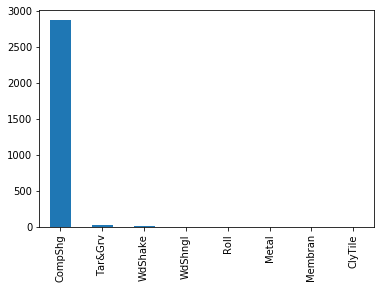

In [41]:
column_investigation(dataset, 'RoofMatl')

### Exterior1st
Data_description: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Type:object
Unique values:
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


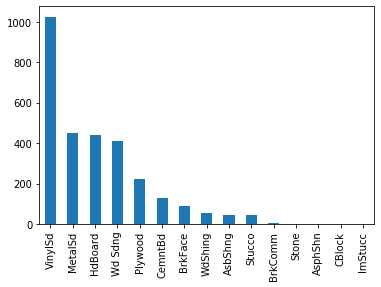

In [42]:
column_investigation(dataset, 'Exterior1st')

Based on majority of rows have 'VinylSd' on Exterior1st column, we will fill in the nan value with 'VinylSd'

In [43]:
dataset['Exterior1st'] = dataset['Exterior1st'].fillna('VinylSd')
# verify the column again
print("Number of nan after fillna: {}".format(dataset['Exterior1st'].isnull().sum()))

Number of nan after fillna: 0


### Exterior2nd
Data_description: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Type:object
Unique values:
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


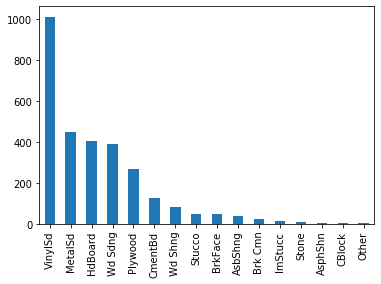

In [44]:
column_investigation(dataset, 'Exterior2nd')

For the same reason, we will fill in the nan value with 'VinylSd' as well

In [45]:
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna('VinylSd')
# verify
print("Number of nan after fillna: {}".format(dataset['Exterior2nd'].isnull().sum()))

Number of nan after fillna: 0


### MasVnrType
Data_description: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

Type:object
Unique values:
None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64
Null values: 24

AxesSubplot(0.125,0.125;0.775x0.755)


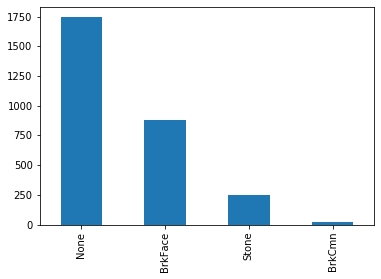

In [46]:
column_investigation(dataset, 'MasVnrType')

The column contains unique value 'none'. We will assign the remaing 24 null values as 'none'

In [47]:
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
print("Number of nan after fillna: {}".format(dataset['MasVnrType'].isnull().sum()))

Number of nan after fillna: 0


### MasVnrArea
Data_description: Masonry veneer area in square feet

Type:float64
Unique values:
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64
Null values: 23

AxesSubplot(0.125,0.125;0.775x0.755)


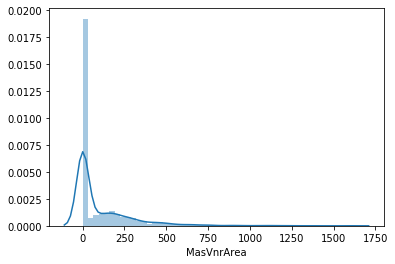

In [48]:
column_investigation(dataset, 'MasVnrArea')

In [49]:
# replace the null values to 0
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0.0)
print('Number of null values: {}'.format(dataset['MasVnrArea'].isnull().sum()))

Number of null values: 0


### ExterQual
Data_description: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Type:object
Unique values:
TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


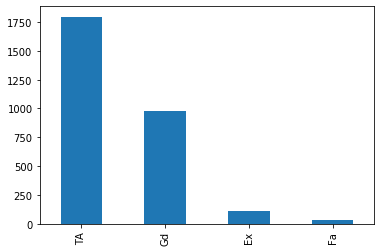

In [50]:
column_investigation(dataset, 'ExterQual')

### ExterCond
Data_description: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Type:object
Unique values:
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


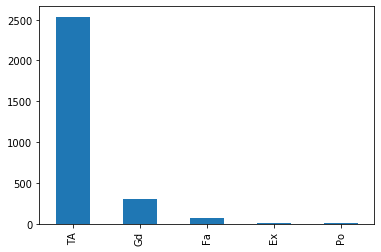

In [51]:
column_investigation(dataset, 'ExterCond')

### Foundation:
Data_description: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

Type:object
Unique values:
PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


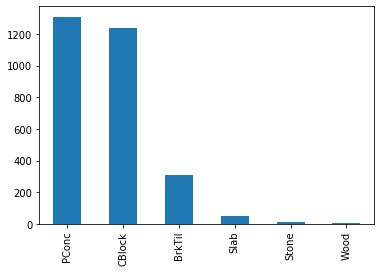

In [52]:
column_investigation(dataset, 'Foundation')

### BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

Type:object
Unique values:
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Null values: 81

AxesSubplot(0.125,0.125;0.775x0.755)


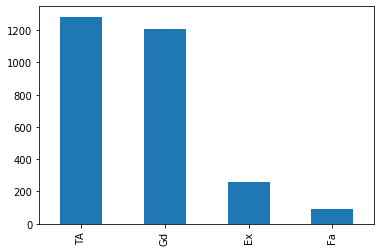

In [53]:
column_investigation(dataset, 'BsmtQual')

We will assign all the null values to 'NA' as str

In [54]:
dataset['BsmtQual'] = dataset['BsmtQual'].fillna('NA')
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['BsmtQual'].isnull().sum()))

After fillna null values: 0


### BsmtCond
Data_description: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

Type:object
Unique values:
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Null values: 82

AxesSubplot(0.125,0.125;0.775x0.755)


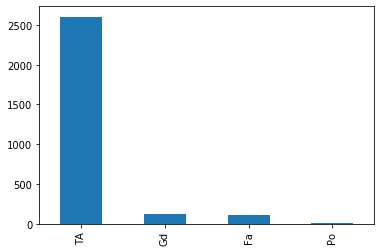

In [55]:
column_investigation(dataset, 'BsmtCond')

We will assign all the null values to 'NA' as str

In [56]:
dataset['BsmtCond'] = dataset['BsmtCond'].fillna('NA')
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['BsmtCond'].isnull().sum()))

After fillna null values: 0


### BsmtExposure
Data_description: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Type:object
Unique values:
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Null values: 82

AxesSubplot(0.125,0.125;0.775x0.755)


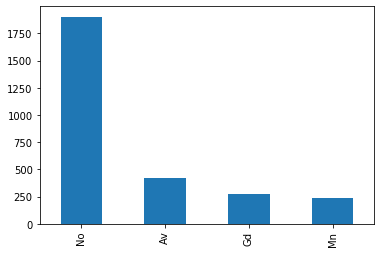

In [57]:
column_investigation(dataset, 'BsmtExposure')

We will assign all the null values to 'NA' as str

In [58]:
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna('NA')
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['BsmtExposure'].isnull().sum()))

After fillna null values: 0


### BsmtFinType1
Data_description: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Type:object
Unique values:
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Null values: 79

AxesSubplot(0.125,0.125;0.775x0.755)


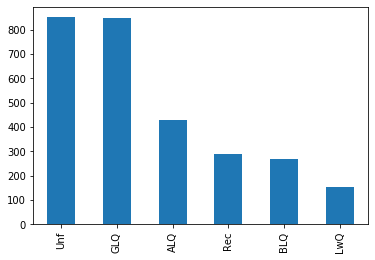

In [59]:
column_investigation(dataset, 'BsmtFinType1')

We will assign all the null values to 'NA' as str

In [60]:
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna('NA')
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['BsmtFinType1'].isnull().sum()))

After fillna null values: 0


### BsmtFinSF1
Data_description: Type 1 finished square feet

Type:float64
Unique values:
0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
1022.0      1
939.0       1
1124.0      1
1619.0      1
1106.0      1
Name: BsmtFinSF1, Length: 991, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


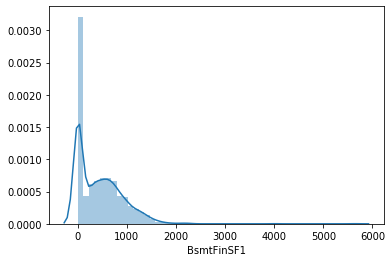

In [61]:
column_investigation(dataset, 'BsmtFinSF1')

In [62]:
# replace null with 0
dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(0.0)
print('Number of null: {}'.format(dataset['BsmtFinSF1'].isnull().sum()))

Number of null: 0


### BsmtFinType2
Data_description: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Type:object
Unique values:
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
Null values: 80

AxesSubplot(0.125,0.125;0.775x0.755)


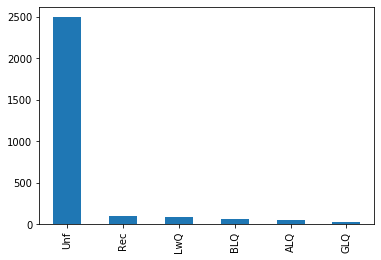

In [63]:
column_investigation(dataset, 'BsmtFinType2')

We will assign all the null values to 'NA' as str

In [64]:
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna('NA')
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['BsmtFinType2'].isnull().sum()))

After fillna null values: 0


### BsmtFinSF2
Data_description: Type 2 finished square feet

Type:float64
Unique values:
0.0      2571
294.0       5
180.0       5
162.0       3
539.0       3
         ... 
196.0       1
904.0       1
456.0       1
624.0       1
823.0       1
Name: BsmtFinSF2, Length: 272, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


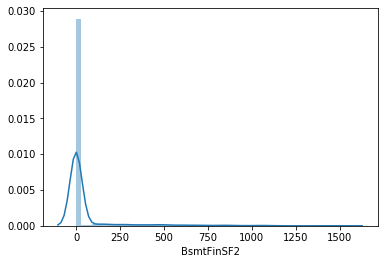

In [65]:
column_investigation(dataset, 'BsmtFinSF2')

In [66]:
dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(0.0)
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['BsmtFinSF2'].isnull().sum()))

After fillna null values: 0


### BsmtUnfSF
Data_description: Unfinished square feet of basement area

Type:float64
Unique values:
0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
1503.0      1
445.0       1
958.0       1
1559.0      1
1369.0      1
Name: BsmtUnfSF, Length: 1135, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


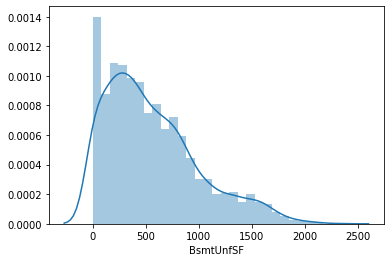

In [67]:
column_investigation(dataset, 'BsmtUnfSF')

In [68]:
# replace the null value to 0.0
dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(0.0)
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['BsmtUnfSF'].isnull().sum()))

After fillna null values: 0


### TotalBsmtSF
Data_description: Total square feet of basement area


Type:float64
Unique values:
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


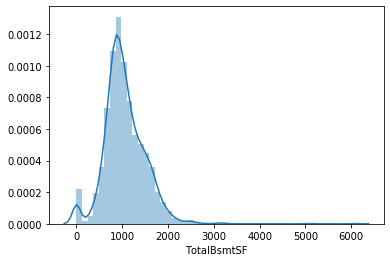

In [69]:
column_investigation(dataset, 'TotalBsmtSF')

In [70]:
dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(0.0)
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['TotalBsmtSF'].isnull().sum()))

After fillna null values: 0


### Heating
Data_description: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Type:object
Unique values:
GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


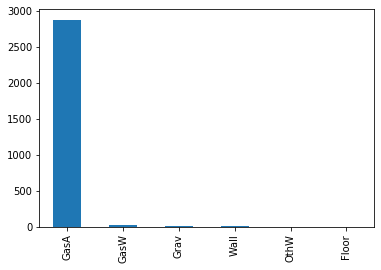

In [71]:
column_investigation(dataset, 'Heating')

### HeatingQC
Data_description: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Type:object
Unique values:
Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


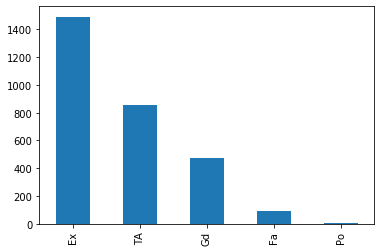

In [72]:
column_investigation(dataset, 'HeatingQC')

### CentralAir
Data_description: Central air conditioning

       N	No
       Y	Yes

Type:object
Unique values:
Y    2723
N     196
Name: CentralAir, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


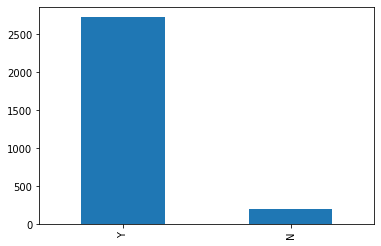

In [73]:
column_investigation(dataset, 'CentralAir')

### Electrical
Data_description: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

Type:object
Unique values:
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


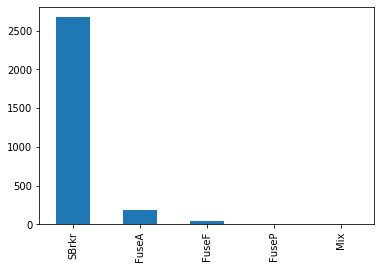

In [74]:
column_investigation(dataset, 'Electrical')

Based on majority of the rows fall into 'SBrkr', so we will replace the null value in this column into 'SBrkr'

In [75]:
dataset['Electrical'] = dataset['Electrical'].fillna('SBrkr')
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['Electrical'].isnull().sum()))

After fillna null values: 0


### 1stFlrSF
Data_description: First Floor square feet

Type:int64
Unique values:
864     46
1040    28
912     19
848     18
960     18
        ..
2084     1
2076     1
2064     1
2048     1
2053     1
Name: 1stFlrSF, Length: 1083, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


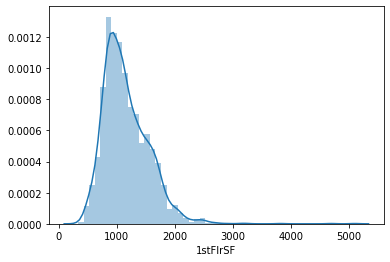

In [76]:
column_investigation(dataset, '1stFlrSF')

### 2ndFlrSF
Data_description: Second floor square feet

Type:int64
Unique values:
0       1668
546       23
728       18
504       17
672       13
        ... 
1036       1
1038       1
1042       1
1048       1
1721       1
Name: 2ndFlrSF, Length: 635, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


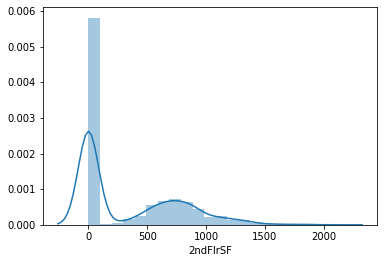

In [77]:
column_investigation(dataset, '2ndFlrSF')

### LowQualFinSF
Data_description: Low quality finished square feet (all floors)

Type:int64
Unique values:
0       2879
80         4
205        2
360        2
390        1
384        1
362        1
312        1
234        1
232        1
420        1
156        1
144        1
140        1
120        1
114        1
108        1
392        1
697        1
515        1
371        1
513        1
481        1
479        1
473        1
431        1
397        1
259        1
450        1
53         1
1064       1
572        1
528        1
514        1
512        1
436        1
Name: LowQualFinSF, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


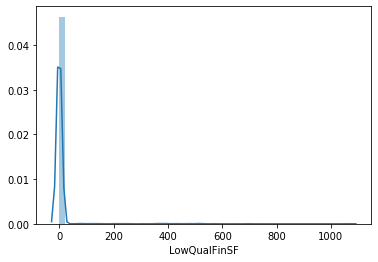

In [78]:
column_investigation(dataset, 'LowQualFinSF')

### GrLivArea
Data_description: Above grade (ground) living area square feet

Type:int64
Unique values:
864     41
1092    26
1040    25
1456    20
1200    18
        ..
2402     1
2400     1
2398     1
2380     1
2049     1
Name: GrLivArea, Length: 1292, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


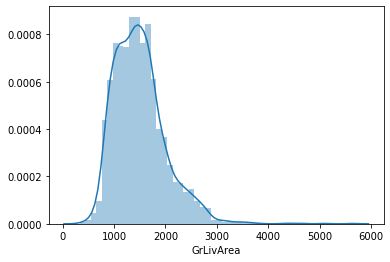

In [79]:
column_investigation(dataset, 'GrLivArea')

### BsmtFullBath
Data_description: Basement full bathrooms

Type:float64
Unique values:
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64
Null values: 2

AxesSubplot(0.125,0.125;0.775x0.755)


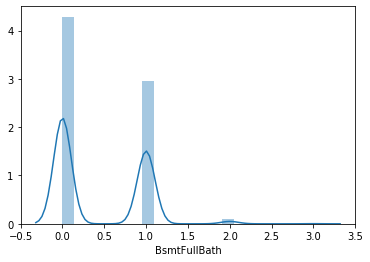

In [80]:
column_investigation(dataset, 'BsmtFullBath')

In [81]:
# assign all the null values to 0.0 
dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0.0)
print('Number of null values: {}'.format(dataset['BsmtFullBath'].isnull().sum()))

Number of null values: 0


### BsmtHalfBath
Data_description: Basement half bathrooms

Type:float64
Unique values:
0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64
Null values: 2

AxesSubplot(0.125,0.125;0.775x0.755)


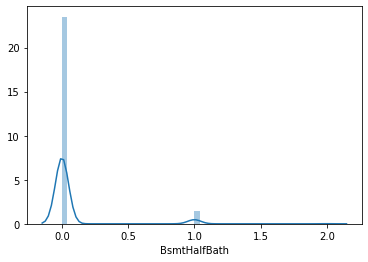

In [82]:
column_investigation(dataset, 'BsmtHalfBath')

In [83]:
# assign all the null values to 0.0 
dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0.0)
print('Number of null values: {}'.format(dataset['BsmtHalfBath'].isnull().sum()))

Number of null values: 0


### FullBath
Data_description: Full bathrooms above grade

Type:int64
Unique values:
2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


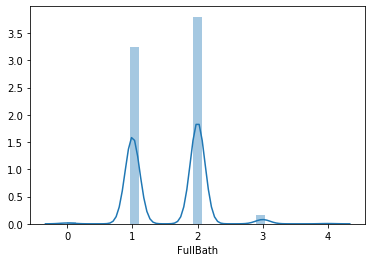

In [84]:
column_investigation(dataset, 'FullBath')

### HalfBath
Data_description: Half baths above grade

Type:int64
Unique values:
0    1834
1    1060
2      25
Name: HalfBath, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


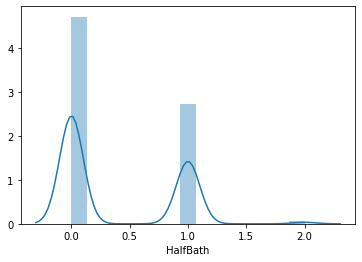

In [85]:
column_investigation(dataset, 'HalfBath')

### Bedroom
Data_description: Bedrooms above grade (does NOT include basement bedrooms)

Type:int64
Unique values:
3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


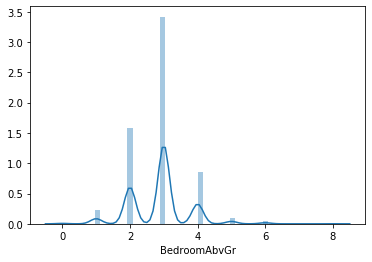

In [86]:
column_investigation(dataset, 'BedroomAbvGr')

### Kitchen
Data_description: Kitchens above grade

Type:int64
Unique values:
1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


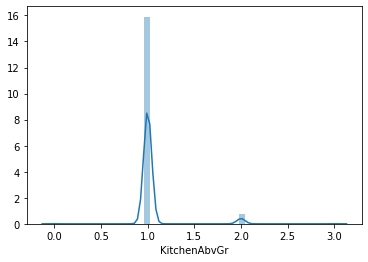

In [87]:
column_investigation(dataset, 'KitchenAbvGr')

### KitchenQual
Data_description: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Type:object
Unique values:
TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


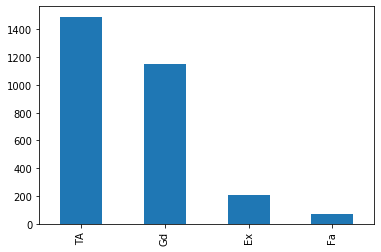

In [88]:
column_investigation(dataset, 'KitchenQual')

We'll assign the null value to 'TA' since it is the most common value

In [89]:
dataset['KitchenQual'] = dataset['KitchenQual'].fillna('TA')
# verfy null values after fillna
print("After fillna null values: {}".format(dataset['KitchenQual'].isnull().sum()))
# store column name into cate_cols
cate_cols.append('KitchenQual')

After fillna null values: 0


### TotRmsAbvGrd
Data_description: Total rooms above grade (does not include bathrooms)

Type:int64
Unique values:
6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
15      1
13      1
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


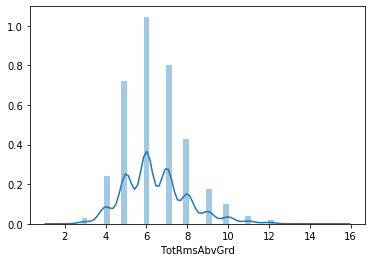

In [90]:
column_investigation(dataset, 'TotRmsAbvGrd')

### Functional
Data_description: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Type:object
Unique values:
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
Null values: 2

AxesSubplot(0.125,0.125;0.775x0.755)


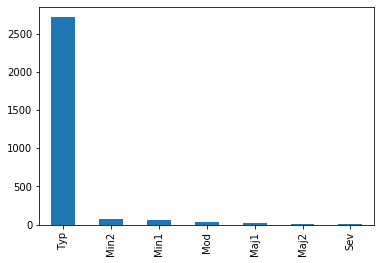

In [91]:
column_investigation(dataset, 'Functional')

We will replace the 2 null values with 'Typ'

In [92]:
dataset['Functional'] = dataset['Functional'].fillna('Typ')
print('Number of missing values in this column {}'.format(dataset['Functional'].isnull().sum()))

Number of missing values in this column 0


### Fireplaces
Data_description: Number of fireplaces

Type:int64
Unique values:
0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


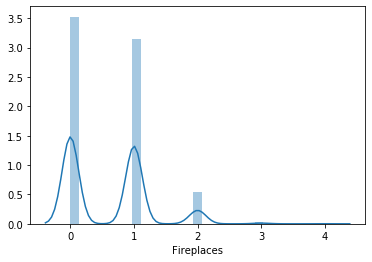

In [93]:
column_investigation(dataset, 'Fireplaces')

### FireplaceQu
Data_description: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Type:object
Unique values:
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Null values: 1420

AxesSubplot(0.125,0.125;0.775x0.755)


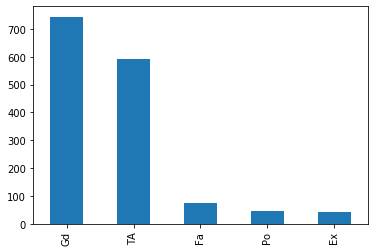

In [94]:
column_investigation(dataset, 'FireplaceQu')

We will replace all the null values in this column to 'NA'

In [95]:
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('NA')
print('Number of null values after fillna: {}'.format(dataset['FireplaceQu'].isnull().sum()))

Number of null values after fillna: 0


### GarageType
Data_description: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Type:object
Unique values:
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
Null values: 157

AxesSubplot(0.125,0.125;0.775x0.755)


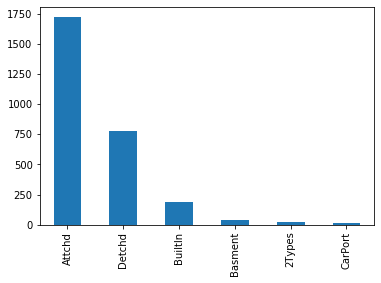

In [96]:
column_investigation(dataset, 'GarageType')

We will replace the all null values to 'NA'

In [97]:
dataset['GarageType'] = dataset['GarageType'].fillna('NA')
print('Number of null values after fillna: {}'.format(dataset['GarageType'].isnull().sum()))

Number of null values after fillna: 0


### GarageYrBlt
Data_description: Year garage was built

Type:float64
Unique values:
2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1933.0      1
1943.0      1
1906.0      1
1919.0      1
1896.0      1
Name: GarageYrBlt, Length: 103, dtype: int64
Null values: 159

AxesSubplot(0.125,0.125;0.775x0.755)


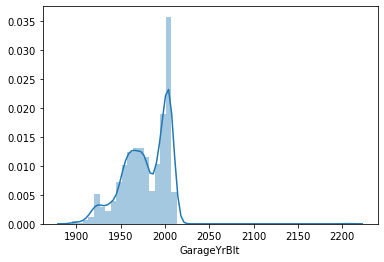

In [98]:
column_investigation(dataset, 'GarageYrBlt')

In [99]:
# add this column to missing_num_cols
missing_num_cols.append('GarageYrBlt')

### GarageFinish
Data_description: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Type:object
Unique values:
Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64
Null values: 159

AxesSubplot(0.125,0.125;0.775x0.755)


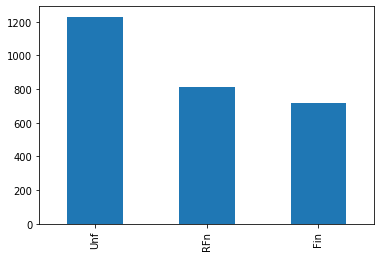

In [100]:
column_investigation(dataset, 'GarageFinish')

We will assign the missing values to 'NA'

In [101]:
dataset['GarageFinish'] = dataset['GarageFinish'].fillna('NA')
print('Number of null values: {}'.format(dataset['GarageFinish'].isnull().sum()))

Number of null values: 0


### GarageCars
Data_description: Size of garage in car capacity

Type:float64
Unique values:
2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


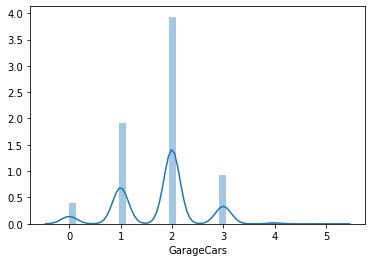

In [102]:
column_investigation(dataset, 'GarageCars')

We will replace the null values with 0

In [103]:
dataset['GarageCars'] = dataset['GarageCars'].fillna(0.0)
print('Number of null values: {}'.format(dataset['GarageCars'].isnull().sum()))

Number of null values: 0


### GarageArea
Data_description: Size of garage in square feet

Type:float64
Unique values:
0.0      157
576.0     97
440.0     96
240.0     69
484.0     68
        ... 
443.0      1
424.0      1
263.0      1
962.0      1
803.0      1
Name: GarageArea, Length: 603, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


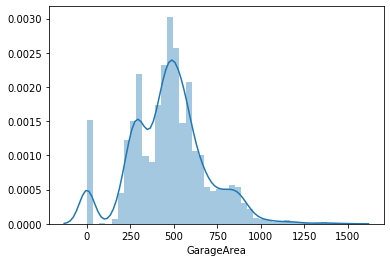

In [104]:
column_investigation(dataset, 'GarageArea')

We will just assign the null value to 0.0

In [105]:
dataset['GarageArea'] = dataset['GarageArea'].fillna(0.0)
print("Number of null after fillna: {}".format(dataset['GarageArea'].isnull().sum()))

Number of null after fillna: 0


### GarageQual
Data_description: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Type:object
Unique values:
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64
Null values: 159

AxesSubplot(0.125,0.125;0.775x0.755)


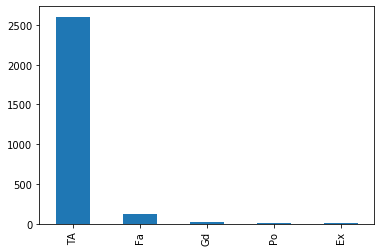

In [106]:
column_investigation(dataset, 'GarageQual')

In [107]:
# assign null values to 'NA'
dataset['GarageQual'] = dataset['GarageQual'].fillna('NA')
print("Number of null values after fillna: {}".format(dataset['GarageQual'].isnull().sum()))

Number of null values after fillna: 0


### GarageCond
Data_description: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Type:object
Unique values:
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64
Null values: 159

AxesSubplot(0.125,0.125;0.775x0.755)


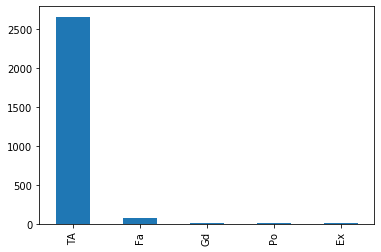

In [108]:
column_investigation(dataset, 'GarageCond')

In [109]:
# assign null values to 'NA'
dataset['GarageCond'] = dataset['GarageCond'].fillna('NA')
print("Number of null values after fillna: {}".format(dataset['GarageCond'].isnull().sum()))

Number of null values after fillna: 0


### PavedDrive
Data_description: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Type:object
Unique values:
Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


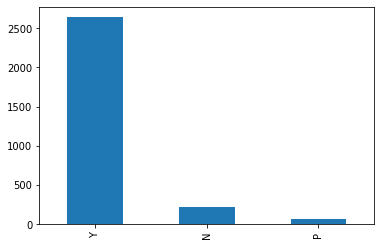

In [110]:
column_investigation(dataset, 'PavedDrive')

### WoodDeckSF
Data_description: Wood deck area in square feet

Type:int64
Unique values:
0      1523
100      74
192      70
144      61
168      56
       ... 
95        1
97        1
99        1
274       1
857       1
Name: WoodDeckSF, Length: 379, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


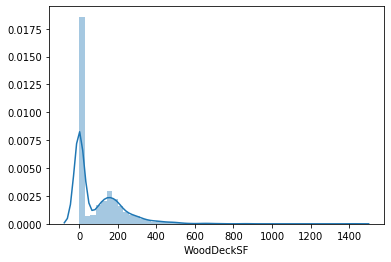

In [111]:
column_investigation(dataset, 'WoodDeckSF')

### OpenPorchSF
Data_description: Open porch area in square feet

Type:int64
Unique values:
0      1298
36       52
48       51
40       44
32       38
       ... 
368       1
364       1
324       1
292       1
288       1
Name: OpenPorchSF, Length: 252, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


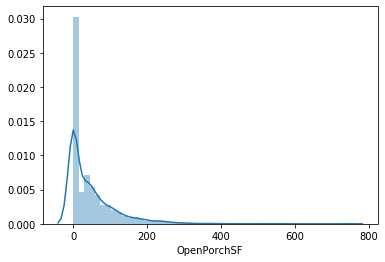

In [112]:
column_investigation(dataset, 'OpenPorchSF')

### EnclosedPorch
Data_description: Enclosed porch area in square feet

Type:int64
Unique values:
0      2460
112      22
96       13
144      11
192      10
       ... 
334       1
330       1
324       1
318       1
238       1
Name: EnclosedPorch, Length: 183, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


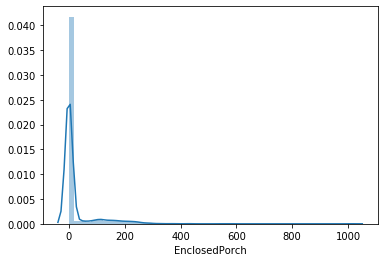

In [113]:
column_investigation(dataset, 'EnclosedPorch')

### 3SsnPorch
Data_description: Three season porch area in square feet

Type:int64
Unique values:
0      2882
153       3
168       3
144       2
180       2
216       2
219       1
176       1
86        1
96        1
120       1
130       1
140       1
255       1
150       1
162       1
245       1
174       1
225       1
23        1
182       1
196       1
323       1
224       1
238       1
290       1
304       1
320       1
360       1
508       1
407       1
Name: 3SsnPorch, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


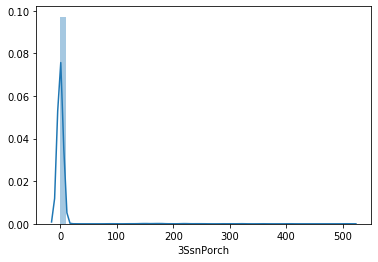

In [114]:
column_investigation(dataset, '3SsnPorch')

### ScreenPorch
Data_description: Screen porch area in square feet

Type:int64
Unique values:
0      2663
144      13
192      11
168      10
120       9
       ... 
490       1
576       1
53        1
63        1
264       1
Name: ScreenPorch, Length: 121, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


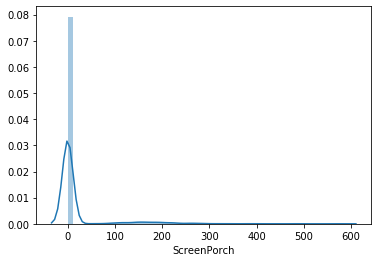

In [115]:
column_investigation(dataset, 'ScreenPorch')

### PoolArea
Data_description: Pool area in square feet

Type:int64
Unique values:
0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


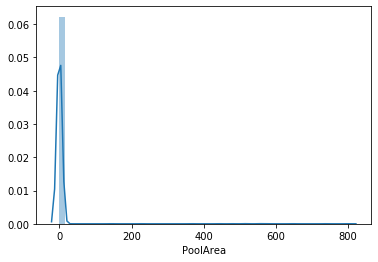

In [116]:
column_investigation(dataset, 'PoolArea')

### PoolQC
Data_description: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Type:object
Unique values:
Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
Null values: 2909

AxesSubplot(0.125,0.125;0.775x0.755)


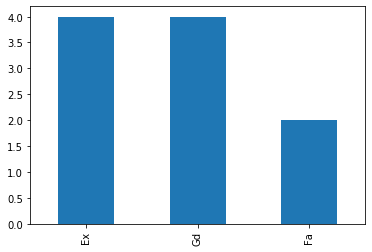

In [117]:
column_investigation(dataset, 'PoolQC')

In [118]:
# replace null value to 'NA'
dataset['PoolQC'] = dataset['PoolQC'].fillna('NA')
print("Number of null values after fillna: {}".format(dataset['PoolQC'].isnull().sum()))

Number of null values after fillna: 0


### Fence
Data_description: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

Type:object
Unique values:
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Null values: 2348

AxesSubplot(0.125,0.125;0.775x0.755)


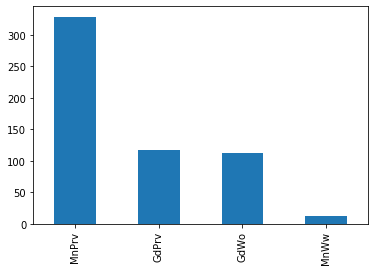

In [119]:
column_investigation(dataset, 'Fence')

In [120]:
# replace null value to 'NA'
dataset['Fence'] = dataset['Fence'].fillna('NA')
print("Number of null values after fillna: {}".format(dataset['Fence'].isnull().sum()))

Number of null values after fillna: 0


### MiscFeature
Data_description: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Type:object
Unique values:
Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64
Null values: 2814

AxesSubplot(0.125,0.125;0.775x0.755)


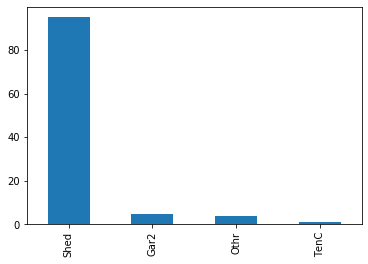

In [121]:
column_investigation(dataset, 'MiscFeature')

In [122]:
# replace null value to 'NA'
dataset['MiscFeature'] = dataset['MiscFeature'].fillna('NA')
print("Number of null values after fillna: {}".format(dataset['MiscFeature'].isnull().sum()))

Number of null values after fillna: 0


### MiscVal
Data_description: $Value of miscellaneous feature

Type:int64
Unique values:
0        2816
400        18
500        13
450         9
600         8
700         7
2000        7
650         3
1200        3
1500        3
4500        2
2500        2
480         2
3000        2
12500       1
300         1
350         1
8300        1
420         1
80          1
54          1
460         1
490         1
3500        1
560         1
17000       1
15500       1
750         1
800         1
900         1
1000        1
1150        1
1300        1
1400        1
1512        1
6500        1
455         1
620         1
Name: MiscVal, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


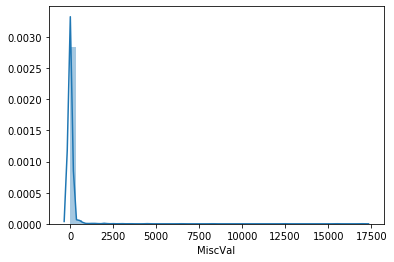

In [123]:
column_investigation(dataset, 'MiscVal')

### MoSold
Data_description: Month Sold (MM)

Type:int64
Unique values:
6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


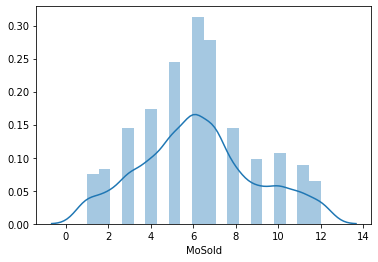

In [124]:
column_investigation(dataset, 'MoSold')

### YrSold
Data_description: Year Sold (YYYY)

Type:int64
Unique values:
2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


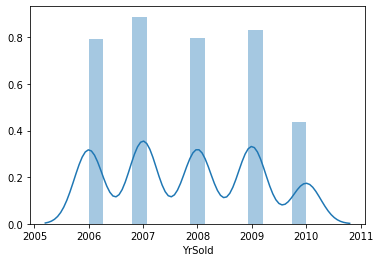

In [125]:
column_investigation(dataset, 'YrSold')

### SaleType:
Data_description: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

Type:object
Unique values:
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64
Null values: 1

AxesSubplot(0.125,0.125;0.775x0.755)


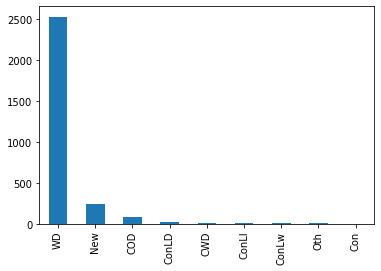

In [126]:
column_investigation(dataset, 'SaleType')

In [127]:
# replace na value to 'WD' because majority of rows have 'WD' in this column
dataset['SaleType'] = dataset['SaleType'].fillna('WD')
print("Number of null values after fillna: {}".format(dataset['SaleType'].isnull().sum()))

Number of null values after fillna: 0


### SaleCondition
Data_description: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Type:object
Unique values:
Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64
Null values: 0

AxesSubplot(0.125,0.125;0.775x0.755)


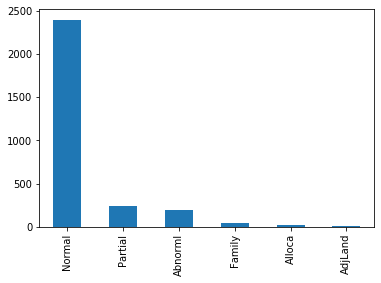

In [128]:
column_investigation(dataset, 'SaleCondition')

In [129]:
# now replace the columns in the missing_num_cols with the mode based on 'Neighborhood'
print('Number of null values in these columns: {}'.format(dataset[missing_num_cols].isnull().sum()))
for col in missing_num_cols:
    dataset[col] = dataset.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mode()[0]))

Number of null values in these columns: LotFrontage    486
GarageYrBlt    159
dtype: int64


In [130]:
print('Number of null values in these columns after cleaning: {}'.format(dataset[missing_num_cols].isnull().sum()))

Number of null values in these columns after cleaning: LotFrontage    0
GarageYrBlt    0
dtype: int64


### Investigate target column: SalePrice

Skewnss: 2.5492483896425098
Kurtosis: 14.665035465759864


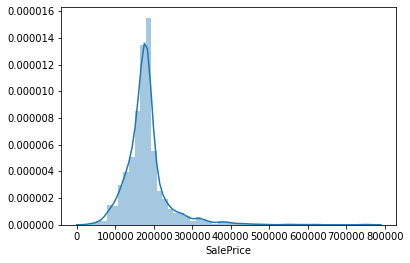

In [131]:
sns.distplot(dataset['SalePrice'])
# check skewness and kurtosis
print('Skewnss: {}'.format(dataset['SalePrice'].skew()))
print('Kurtosis: {}'.format(dataset['SalePrice'].kurt()))

The target column is not a normal distribution. We can make a log transformation to improve the performance of the model

Skewnss: -0.15038107515348223
Kurtosis: 3.7400837376032214


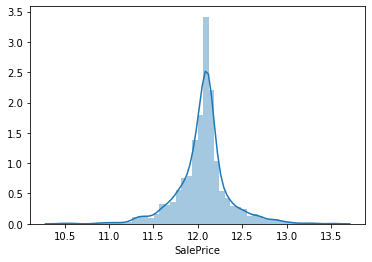

In [132]:
import numpy as np

dataset['SalePrice'] = np.log(dataset['SalePrice'])
# verify the target column
sns.distplot(dataset['SalePrice'])
# check skewness and kurtosis
print('Skewnss: {}'.format(dataset['SalePrice'].skew()))
print('Kurtosis: {}'.format(dataset['SalePrice'].kurt()))

In [133]:
# reexamine the dataset after data cleaning
print('Shape of the data after clearning: {}'.format(dataset.shape))
print('Number of null values in the dataset: ', dataset.isnull().sum())

Shape of the data after clearning: (2919, 81)
Number of null values in the dataset:  Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [134]:
missing = dataset.isnull().sum().sort_values(ascending = False)
print(missing)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
Id              0
Length: 81, dtype: int64


## Categorical columns encoding

In [135]:
from sklearn.preprocessing import LabelEncoder
# write a function to perform label encoding for all the columns in cate_cols
def labelencode (df, cols):
    copy_df = df[cols].copy()
    print("Before Label Encode")
    print(copy_df.head())
    for col in cols:
        le = LabelEncoder()
        copy_df[col] = le.fit_transform(copy_df[col])
    print("Label Encoded:")
    print(copy_df.head())
    return copy_df

cate_cols = [col for col in dataset.columns if dataset[col].dtypes == np.object]
print(cate_cols)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [136]:
encoded_cate = labelencode(dataset, cate_cols)

Before Label Encode
  MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave    NA      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave    NA      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave    NA      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave    NA      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave    NA      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageType GarageFinish GarageQual GarageCond  \
0       Gtl      CollgCr  ...     Attchd          RFn         TA         TA   
1       Gtl      Veenker  ...     Attchd          RFn         TA         TA   
2       Gtl      CollgCr  ...     Attchd          RFn         TA         TA   
3       Gtl      Crawfor  ...     Detchd          Unf         TA         TA   
4       Gtl      NoRidge  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence Misc

In [137]:
encoded_cate.dtypes

MSSubClass       int32
MSZoning         int32
Street           int32
Alley            int32
LotShape         int32
LandContour      int32
Utilities        int32
LotConfig        int32
LandSlope        int32
Neighborhood     int32
Condition1       int32
Condition2       int32
BldgType         int32
HouseStyle       int32
OverallQual      int32
OverallCond      int32
RoofStyle        int32
RoofMatl         int32
Exterior1st      int32
Exterior2nd      int32
MasVnrType       int32
ExterQual        int32
ExterCond        int32
Foundation       int32
BsmtQual         int32
BsmtCond         int32
BsmtExposure     int32
BsmtFinType1     int32
BsmtFinType2     int32
Heating          int32
HeatingQC        int32
CentralAir       int32
Electrical       int32
KitchenQual      int32
Functional       int32
FireplaceQu      int32
GarageType       int32
GarageFinish     int32
GarageQual       int32
GarageCond       int32
PavedDrive       int32
PoolQC           int32
Fence            int32
MiscFeature

In [138]:
# get the dummies columns from encoded_cate
print(encoded_cate.shape)
def create_dummies (df):
    print(df.head())
    copy = df.copy()
    for col in df.columns:
        copy = pd.get_dummies(copy, columns=[col])
    print(copy.head())
    return copy
dummies_cate = create_dummies(encoded_cate)
print(dummies_cate.shape)

(2919, 46)
   MSSubClass  MSZoning  Street  Alley  LotShape  LandContour  Utilities  \
0          10         3       1      1         3            3          0   
1           5         3       1      1         3            3          0   
2          10         3       1      1         0            3          0   
3          11         3       1      1         0            3          0   
4          10         3       1      1         0            3          0   

   LotConfig  LandSlope  Neighborhood  ...  GarageType  GarageFinish  \
0          4          0             5  ...           1             2   
1          2          0            24  ...           1             2   
2          4          0             5  ...           1             2   
3          0          0             6  ...           5             3   
4          2          0            15  ...           1             2   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0           5       

## Feature scaling
We need to perform feature scaling on our numeric columns

In [139]:
# this funtion will create a scaled dataframe with given dataframe
from sklearn.preprocessing import MinMaxScaler
def normalization (df):
    copy_df = df.copy()
    for col in df.columns:
        if col != 'Id' and col != 'SalePrice':
            scaler = MinMaxScaler()
            X = copy_df[col].values.reshape(-1, 1)
            copy_df[col] = scaler.fit_transform(X)
    print(copy_df.head())
    return copy_df


numeric_cols = [col for col in dataset.columns if dataset[col].dtypes != np.object]
numeric_data = dataset[numeric_cols]
scaled_num = normalization(numeric_data)
print(scaled_num.head())
print(scaled_num.shape)

   Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1     0.150685  0.033420   0.949275      0.883333     0.12250    0.125089   
1   2     0.202055  0.038795   0.753623      0.433333     0.00000    0.173281   
2   3     0.160959  0.046507   0.934783      0.866667     0.10125    0.086109   
3   4     0.133562  0.038561   0.311594      0.333333     0.00000    0.038271   
4   5     0.215753  0.060576   0.927536      0.833333     0.21875    0.116052   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  WoodDeckSF  OpenPorchSF  \
0         0.0   0.064212     0.140098  ...    0.000000     0.082210   
1         0.0   0.121575     0.206547  ...    0.209270     0.000000   
2         0.0   0.185788     0.150573  ...    0.000000     0.056604   
3         0.0   0.231164     0.123732  ...    0.000000     0.047170   
4         0.0   0.209760     0.187398  ...    0.134831     0.113208   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0    

## Brute Force Approach

In [140]:
# combine encoded_cate with numeric_cols
print(dummies_cate.shape)
full_features = pd.concat([scaled_num, dummies_cate], axis=1)
print(full_features.head())

(2919, 301)
   Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1     0.150685  0.033420   0.949275      0.883333     0.12250    0.125089   
1   2     0.202055  0.038795   0.753623      0.433333     0.00000    0.173281   
2   3     0.160959  0.046507   0.934783      0.866667     0.10125    0.086109   
3   4     0.133562  0.038561   0.311594      0.333333     0.00000    0.038271   
4   5     0.215753  0.060576   0.927536      0.833333     0.21875    0.116052   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_5  SaleType_6  \
0         0.0   0.064212     0.140098  ...           0           0   
1         0.0   0.121575     0.206547  ...           0           0   
2         0.0   0.185788     0.150573  ...           0           0   
3         0.0   0.231164     0.123732  ...           0           0   
4         0.0   0.209760     0.187398  ...           0           0   

   SaleType_7  SaleType_8  SaleCondition_0  SaleCondition_1  SaleCondition_2  \


In [141]:
full_features.shape

(2919, 336)

In [142]:
train = full_features.iloc[:1460]
test = full_features.iloc[1460:]
train_X = train.drop(['Id', 'SalePrice'], axis=1)
train_y = train['SalePrice']
test_X = test.drop(['Id', 'SalePrice'], axis=1)
test_y = test['SalePrice']
print("train_X shape: {}, train_y.shape: {}".format(train_X.shape, train_y.shape))
print("test_X shape: {}, test_y.shape: {}".format(test_X.shape, test_y.shape))

train_X shape: (1460, 334), train_y.shape: (1460,)
test_X shape: (1459, 334), test_y.shape: (1459,)


In [143]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
model = XGBRegressor()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
MSE = mean_squared_error(np.exp(predictions), np.exp(test_y))
print(np.sqrt(MSE))

c:\users\pilot\anaconda3\envs\xgboost\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\pilot\anaconda3\envs\xgboost\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:28:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
69181.35947373859


In [144]:
print(np.exp(predictions[len(predictions) - 5:]))
print(np.exp(test_y.tail()))

[ 81549.59  88687.54 153357.19 126218.34 231209.38]
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, dtype: float64


## Reducing features
Since we have 80 features, of those features may be noise to the data. We will investigate the correlations betweem all the features and we will determine we should keep rather or not we should keep them 

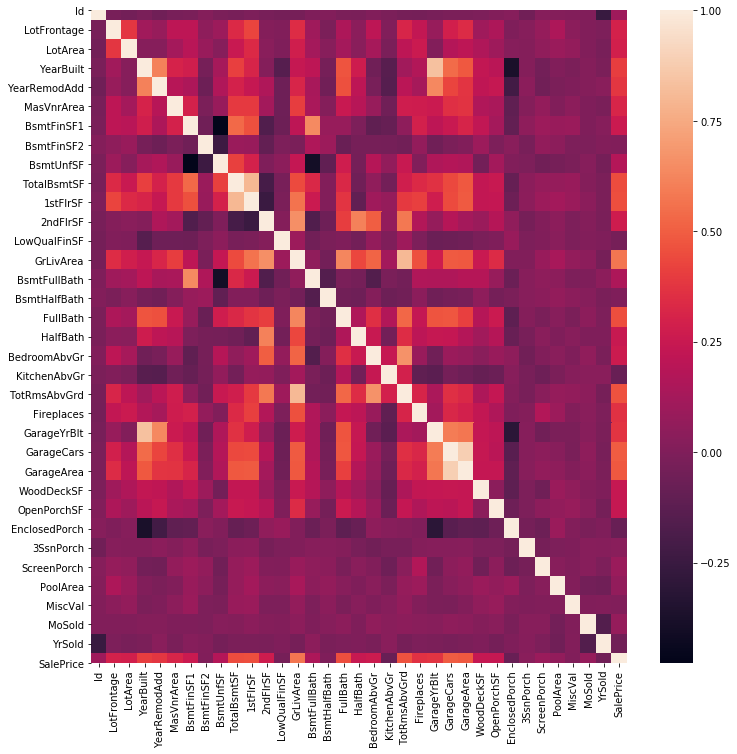

In [145]:
import matplotlib.pyplot as plt
corr = dataset.corr()
fig = plt.figure(figsize=(12, 12))
ax = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


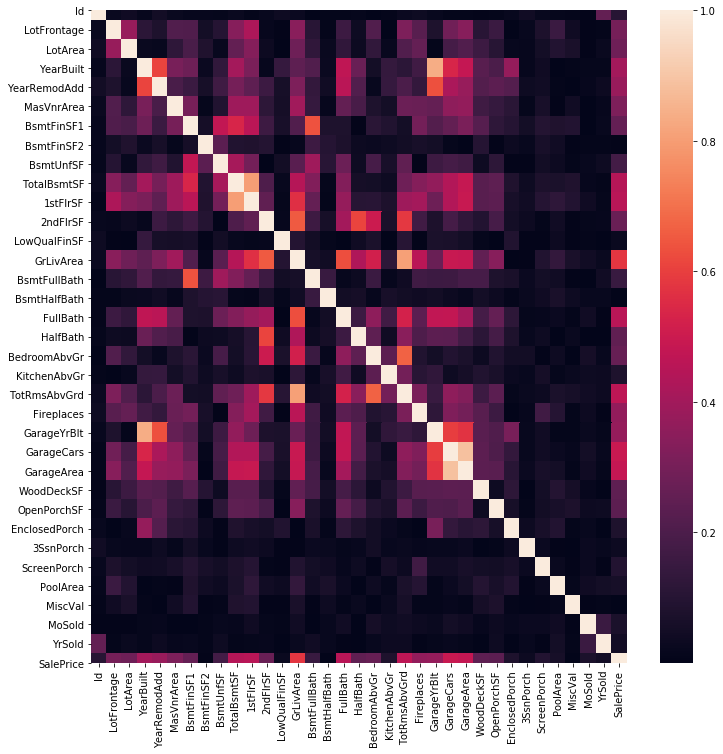

In [146]:
# show absolute values of correlations
abs_corr = corr.abs()

fig = plt.figure(figsize=(12, 12))
ax = sns.heatmap(abs_corr, xticklabels=abs_corr.columns, yticklabels=abs_corr.columns)

In [147]:
low_corr = abs_corr['SalePrice'][abs_corr['SalePrice'] < 0.05]
print(low_corr)

BsmtFinSF2      0.006058
LowQualFinSF    0.026903
BsmtHalfBath    0.002753
3SsnPorch       0.032962
MiscVal         0.002914
YrSold          0.048670
Name: SalePrice, dtype: float64


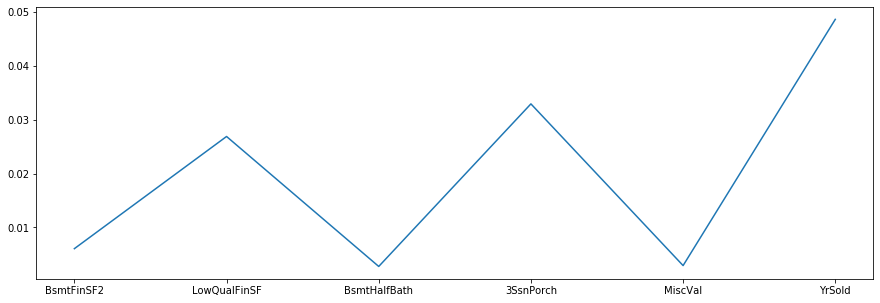

In [148]:
fig = plt.figure(figsize=(15, 5))
plt.plot(low_corr.index, low_corr.values)

### Removing unnecessary features
- Remove columns that have low correlation with the target column

- Remove one of the columns if multiple feature columns have high correlation with each other

    1. From the heatmap we can see 'YearBulit' has very high correlation with 'GarageYrBlt' which means most of the garage were built in the same year as the house. We will drop 'GarageYrBlt'

    2. Both 'GrLivArea' and 'TotRmsAbvGrd' have high correlation with each other. We will drop 'GrLivArea'

    3. Both 'GarageCars' and 'GarageArea' have high correlation with each other. We will drop 'GarageCars'

    4. We'll also remove all the columns from low_corr since they have low correlation with the target column

In [149]:
# make a copy of the dataset before further processing
copy = dataset.copy()
print(copy.shape)
drop_noise_data = dataset.drop(columns=low_corr.index, axis=1)
drop_noise_data = drop_noise_data.drop(columns=['GarageYrBlt', 'GrLivArea', 'GarageCars'], axis=1)
print(drop_noise_data.shape)

(2919, 81)
(2919, 72)


We will encode the categorical columns as well as normalizing the numeric columns again

In [150]:
cate_cols = [col for col in drop_noise_data.columns if drop_noise_data[col].dtypes == np.object]
# encode all the labels for the new categorcial dataset
new_encoded_cate = labelencode(drop_noise_data, cate_cols)
# create dummy columns for encoded_cate
new_dummies_cate = create_dummies(new_encoded_cate)
numeric_cols = [col for col in drop_noise_data.columns if drop_noise_data[col].dtypes != np.object]
numeric_df = drop_noise_data[numeric_cols]
new_scaled_num = normalization(numeric_df)
print(new_dummies_cate.shape)
print(new_scaled_num.shape)

Before Label Encode
  MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave    NA      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave    NA      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave    NA      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave    NA      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave    NA      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageType GarageFinish GarageQual GarageCond  \
0       Gtl      CollgCr  ...     Attchd          RFn         TA         TA   
1       Gtl      Veenker  ...     Attchd          RFn         TA         TA   
2       Gtl      CollgCr  ...     Attchd          RFn         TA         TA   
3       Gtl      Crawfor  ...     Detchd          Unf         TA         TA   
4       Gtl      NoRidge  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence Misc

In [151]:
new_features = pd.concat([new_scaled_num, new_dummies_cate], axis=1)
print(new_features.shape)

(2919, 327)


In [152]:
train = new_features.iloc[:1460]
test = new_features.iloc[1460:]
train_X = train.drop(['Id', 'SalePrice'], axis=1)
train_y = train['SalePrice']
test_X = test.drop(['Id', 'SalePrice'], axis=1)
test_y = test['SalePrice']
print("train_X shape: {}, train_y.shape: {}".format(train_X.shape, train_y.shape))
print("test_X shape: {}, test_y.shape: {}".format(test_X.shape, test_y.shape))

train_X shape: (1460, 325), train_y.shape: (1460,)
test_X shape: (1459, 325), test_y.shape: (1459,)


In [153]:
model = XGBRegressor()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
MSE = mean_squared_error(np.exp(predictions), np.exp(test_y))
print(np.sqrt(MSE))

[23:28:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


c:\users\pilot\anaconda3\envs\xgboost\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\pilot\anaconda3\envs\xgboost\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


68232.3831202315


## Preparing Submission File

In [154]:
submit = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : np.exp(predictions)})
print(submit.shape)
print(submit.head())
print(np.exp(test_y).head())

(1459, 2)
     Id      SalePrice
0  1461  128819.640625
1  1462  150847.343750
2  1463  191625.203125
3  1464  187942.312500
4  1465  182929.937500
0    169277.052498
1    187758.393989
2    183583.683570
3    179317.477511
4    150730.079977
Name: SalePrice, dtype: float64


In [155]:
submit.to_csv('house_price_submission.csv', index=False)